## **Kelompok 5/PYTN-KS-018**
### **Nama:**
1.   Nabila Putri Damayanti/PYTN-KS18-021
2.   Difa Fisabilillah/PYTN-KS18-017

### **Batch: 5**

## **1. Perkenalan**

### 1.1 Latar Belakang
Iklim merupakan salah satu faktor penting yang mempengaruhi kehidupan manusia dan lingkungannya. Salah satu aspek penting dari iklim adalah distribusi curah hujan. Curah hujan memiliki dampak yang cukup signifikan pada berbagai sektor, seperti pertanian, transportasi, dan industri. Oleh karena itu, prediksi cuaca, termasuk prediksi hujan, menjadi hal yang sangat penting untuk dilakukan.

Metode prediksi cuaca dapat digunakan untuk memberikan informasi penting yang dapat digunakan untuk merencanakan tindakan-tindakan dalam menghadapi perubahan cuaca. Dalam konteks prediksi hujan, terdapat banyak metode yang dapat digunakan, termasuk pendekatan statistik dan penggunaan *machine learning*. Metode statistik menggunakan data cuaca historis untuk memprediksi kemungkinan terjaidnya hujan, sedangkan metode *machine learning* menggunakan model matematika untuk memprediksi pola cuaca dan probabilitas terjadinya peristiwa.

Model logistic regression (LR) dan SVM merupakan model yang sering digunakan untuk kasus prediksi. Model LR akan menghasilkan prediksi berdasarkan variabel input yang diberikan dalam bentuk klasifikasi biner, sedangkan SVM menggunakan fungsi kernel untuk memprediksi label kelas dari suatu data.

### 1.2 Data dan Sumber Data
Data ini berasal dari *Kaggle Repository* [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) yang mengandung hasil pengamatan cuaca harian selama 10 tahun dari berbagai lokasi dari seluruh Australia. Dataset tersebut memiliki 22 fitur, dengan kolom **RainTomorrow** merupakan target variabel yang akan diprediksi.

Informasi Fitur:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

### 1.3 Kasus:
Project ini dibuat untuk memprediksi hujan esok hari menggunakan model LR dan SVM yang selanjutnya akan dianalisis model mana yang memiliki performa terbaik untuk melakukan prediksi. Selain itu, project ini dibuat untuk mengetahui fitur-fitur yang berpengaruh pada prediksi hujan.

## **2. Install dan Import Library**

In [ ]:
# Import library dataframe
import pandas as pd
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk modelling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, auc, roc_curve, roc_auc_score, balanced_accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Import library untuk improvement
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

## **3. Data Loading**
Data Loading merupakan proses memuat dataset dari file sumber ke database.

### 3.1 Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd './drive/MyDrive/Hacktiv8/FINAL PROJECT/F2'

/content/drive/MyDrive/Hacktiv8/FINAL PROJECT/F2


In [ ]:
data = pd.read_csv("./weatherAUS.csv")

In [ ]:
data.head() # Preview data weatherAUS.csv

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 3.2 Melihat ukuran data

In [ ]:
data.shape # Untuk melihat ukuran data

(145460, 23)

### 3.3 Melihat data type setiap feature

In [ ]:
data.info() # Cek data type tiap feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Note:**
Dataset memiliki 2 tipe data yaitu float64 dan tipe object atau string. Disini dapat dilihat bahwa kecuali data kolom Date dan Location, semua kolom memiliki missing value

## **4. Data Cleaning**
Data cleaning merupakan proses menyiapkan data dengan menghapus atau memodifikasi data yang tidak relevan atau tidak akurat. Pada data cleaning ini akan dilakukan pengisian missing value menggunakan media untuk tipe data int dan float serta menggunakan modus untuk tipe data object.

### 4.1 Memeriksa missing value

In [ ]:
data.isnull().sum().sum()

343248

Ternyata total missing value yang dimiliki oleh dataset sebanyak 343248.

In [ ]:
data.isnull().sum() # List Nan value

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Note:**
Dari output diatas dapat dilihat total missing value yang dimiliki oleh setiap kolom.

### 4.2 Mengubah tipe data datetime
Mengubah tipe data kolom date dari object menjadi datetime

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

### 4.3 Memeriksa korelasi antar kolom
Pemeriksaan berguna untuk menganalisis hubungan antara dua feature. Hal tersebut dilakukan untuk mendeteksi masalah multikolinearitas (karena dapat menyulitkan kontribusi relatif masing-masing feature terhadap target), pengaruh feature terhadap target, dan mengoptimalkan model.

In [ ]:
# Memeriksa korelasi antar kolom
correlation = data.corr()
correlation.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501


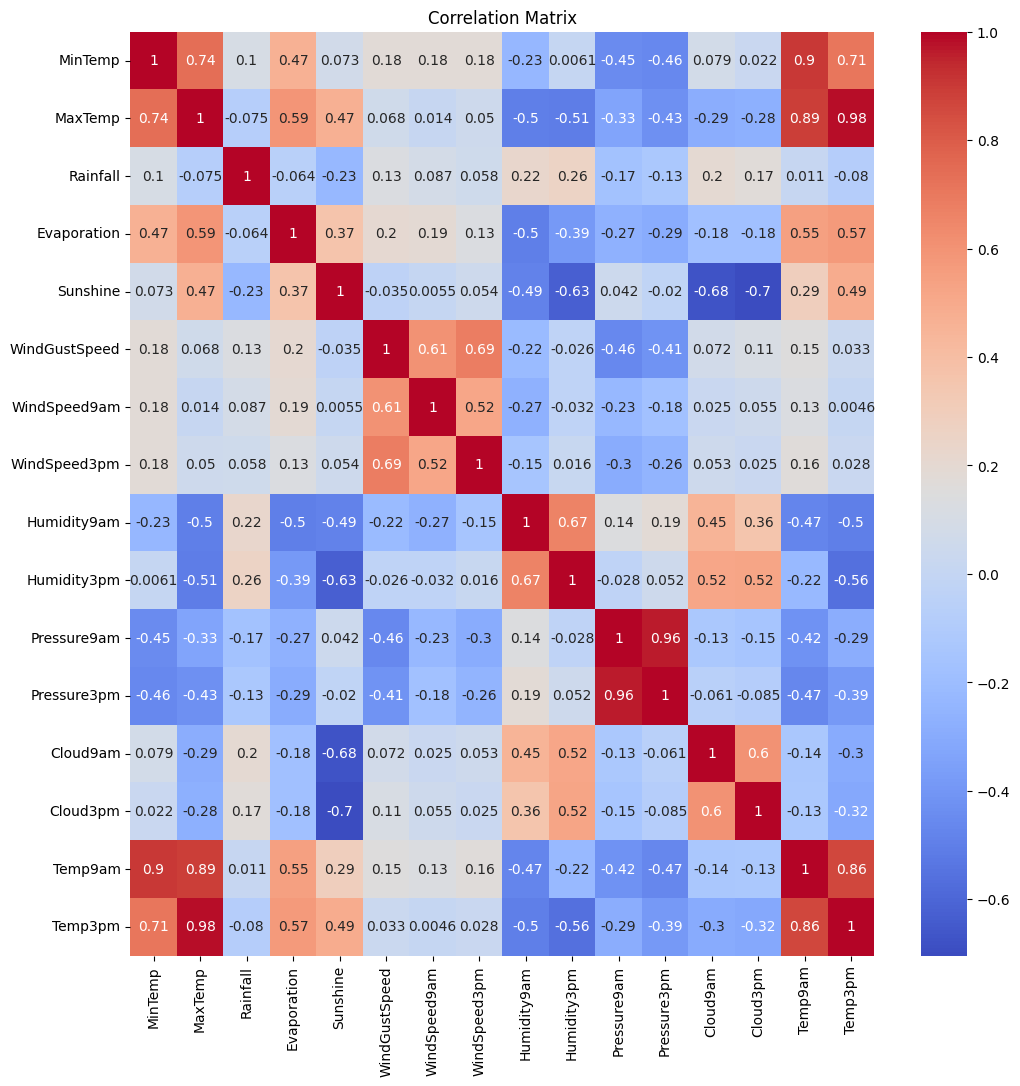

In [ ]:
# Visualisasi korelasi antar kolom
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Note:**
Pemeriksaan korelasi diperlukan untuk mengetahui hubungan antar tiap feature dan didapatkan kesimpulan bahwa:
* Kolom Temp3pm perlu dihapus karena berkorelasi tinggi dengan MaxTemp dan memiliki lebih banyak nilai null daripada MaxTemp.
* Kolom Pressure9am perlu dihapus karena berkorelasi tinggi dengan Pressure3pm.
* Penghapusan kolom Evaporation, Sunshine, dan Cloud9am karena tidak memiliki ketergantungan dan hubungan apapun dengan kolom output.

Masalah multikolinearitas dapat meningkatkan risiko overfitting.

### 4.4 Drop Column

In [ ]:
# Drop kolom "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "Temp3pm", "Pressure9am"
data.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "Temp3pm", "Pressure9am"], axis=1, inplace=True)

In [ ]:
data.shape

(145460, 17)

Untuk sekarang dataset hanya meiliki 145460 bariis dan 17 kolom

In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

### 4.5 Tambah Kolom Baru
Menambahkan kolom baru yang dapat digunakan sebagai fitur tambahan dalam memprediksi RainTomorrow.

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
data.drop('Date', axis=1, inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,16.9,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,17.2,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,21.0,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,18.1,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,17.8,No,No,2008,12,5


## **5. Eksplore Data**
Exploratory data Analysis (EDA) merupakan metode explore data dengan menggunakan teknik aritmatika sederhana dan teknik grafis untuk melihat isi dataset. Explore data ini akan dilakukan menggunakan query, grouping, visualisasi sederhana, dan lainnya.

### 5.1 Bagaimana distribusi data pada kolom RainTomorrow?
Pengecekan ini dilakukan untuk menentukan tahap apa yang harus dilakukan selanjutnya.

In [ ]:
# Menghitung total dari setiap data unik pada kolom RainTomorrow
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

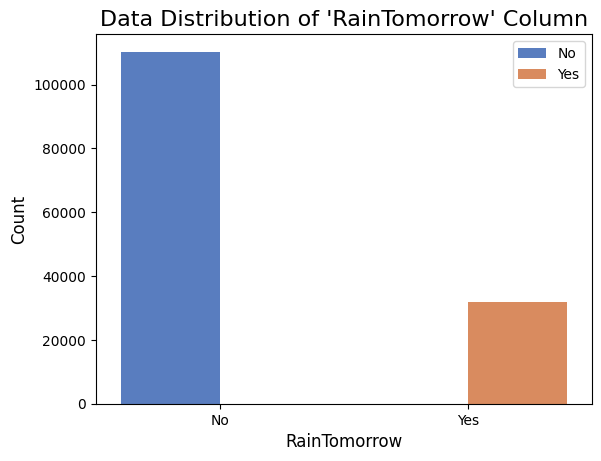

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.countplot(x=data['RainTomorrow'], hue='RainTomorrow', palette="muted", data=data) # Visualisasi kategori Yes dan No pada kolom RainTomorrow
plt.title("Data Distribution of 'RainTomorrow' Column", size=16) # Menambahkan judul
plt.xlabel('RainTomorrow', size=12) # Menambahkan x label
plt.ylabel('Count', size=12) # Menambahkan y label
plt.legend(['No', 'Yes'], loc='upper right') # Memberikan legend
plt.figure(figsize=(10, 8)) # Custom ukuran grafik
sns.set_palette(sns.color_palette('Blues', 2)) # Custom color
plt.show() # Menampilakan grafik

**Note:**
Pada kolom RainTomorrow dataset memiliki data dengan prediksi 'No' lebih banyak dibandingkan prediksi 'yes'.

### 5.2 Membaca deskripsi data bertipe object

In [ ]:
# Fitur numerik
data.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,year,month,day
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130432.000000,143693.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1015.255889,16.990631,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.037414,6.488753,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,977.100000,-7.200000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1010.400000,12.300000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,16.700000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1020.000000,21.600000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1039.600000,40.200000,2017.000000,12.000000,31.000000


**Note:**
count = jumlah baris, unique = total data unik dalam kolom, top = data yang memiliki frekuensi terbanyak (modus), freq = frekuensi dari modus.

### 5.3 Melihat data unik data
Hal ini dilakukan untuk mengidentifikasi label atau data unik dan validasi data.

In [ ]:
# Fitur kategorik
data.describe(include=[object])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


Dari output ini, didapatkan summary dari data kategorikal, dimana terdapat 6 fitur kategorik yaitu ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [ ]:
# fitur numerik
numeric = [column_name for column_name in data.columns if data[column_name].dtype !='O']
print(f"Total Fitur numerik : {format(len(numeric))}")
print(f"Fitur numerik : {numeric}")

Total Fitur numerik : 13
Fitur numerik : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am', 'year', 'month', 'day']


Untuk fitur numerik yang tersedia pada dataset saat ini ada 13 fitur yang terdiri dari kolom ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp9am', 'year', 'month', 'day']

In [ ]:
# Cek data unik pada kolom Location
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# Cek data unik pada kolom WindGustDir
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
# Cek data unik pada kolom WindDir9am
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
# Cek data unik pada kolom WindDir3pm
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

### 5.4 Visualisasi distribusi data pada kolom bertipe data numerik
Hal ini dilakukan untuk mengeksplore data, menjadi pertimbangan proses apa yang perlu dilakukan, dan penyesuaian dengan tujuan analisis.

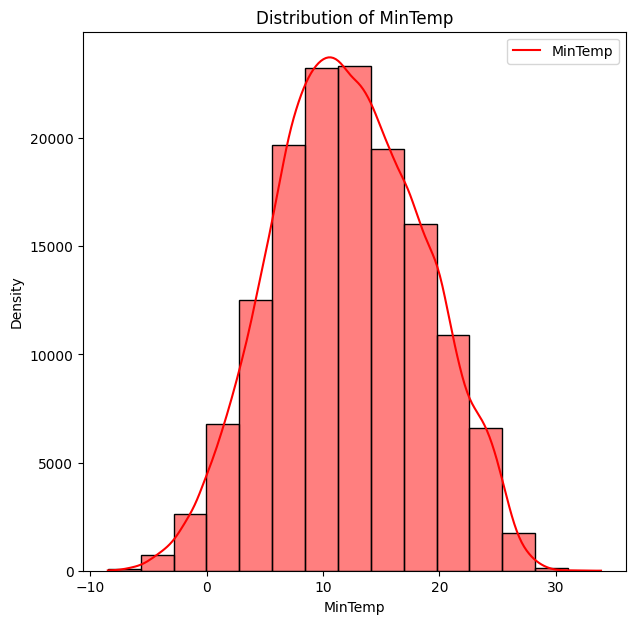

<Figure size 1000x800 with 0 Axes>

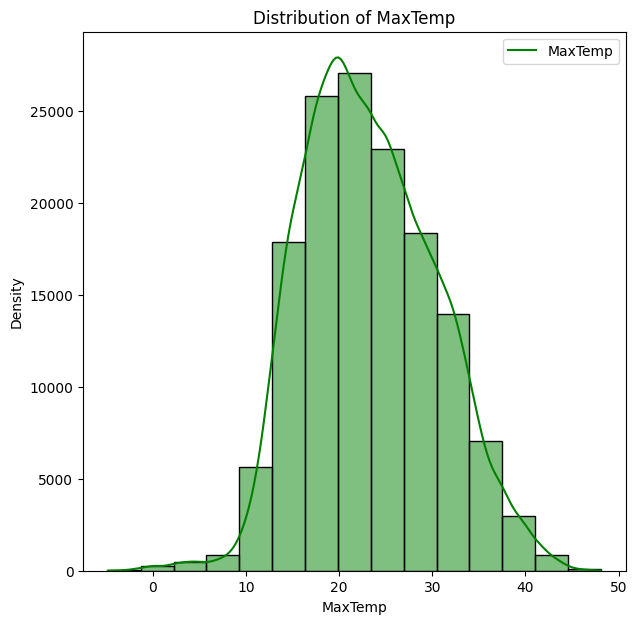

<Figure size 1000x800 with 0 Axes>

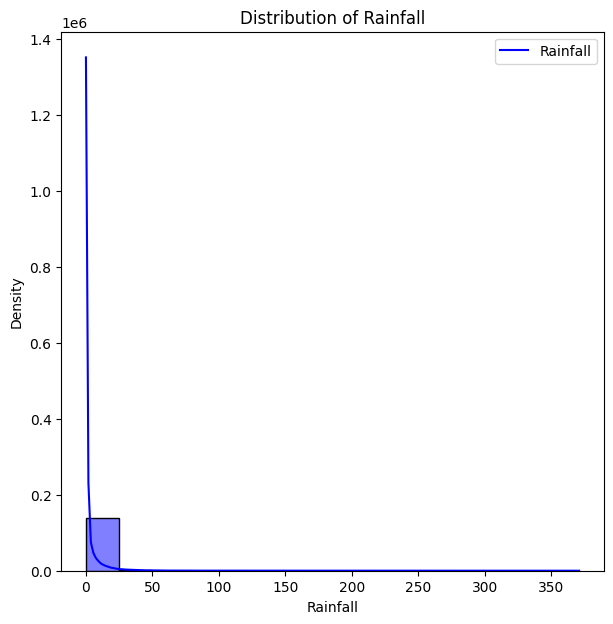

<Figure size 1000x800 with 0 Axes>

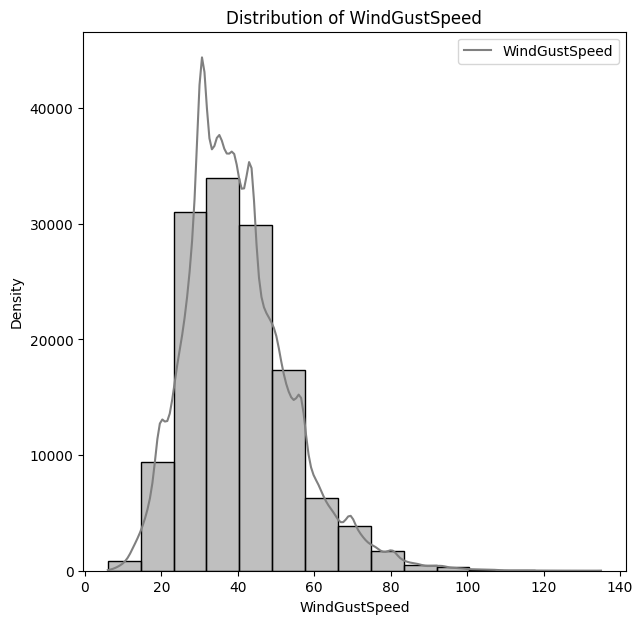

<Figure size 1000x800 with 0 Axes>

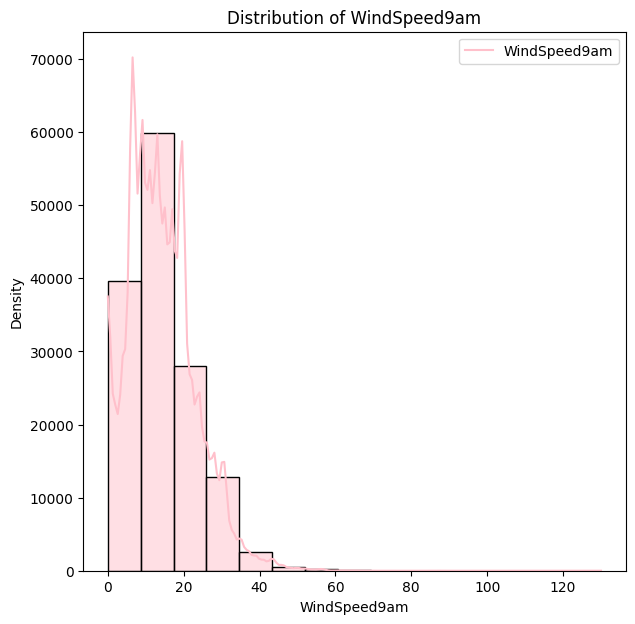

<Figure size 1000x800 with 0 Axes>

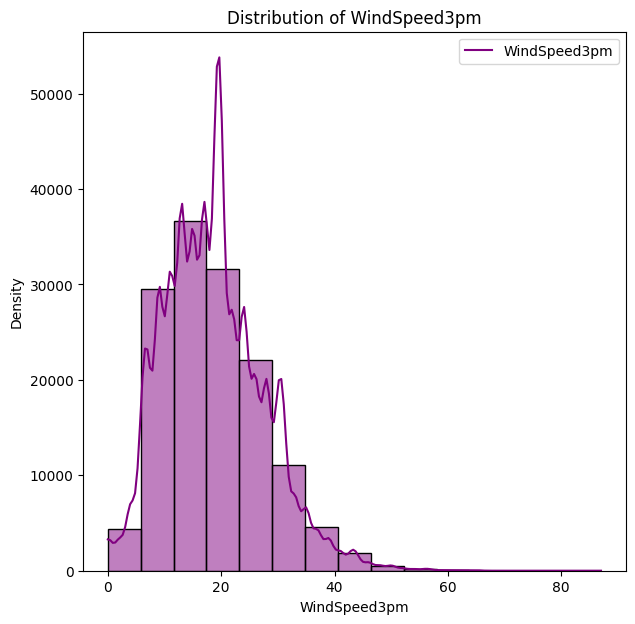

<Figure size 1000x800 with 0 Axes>

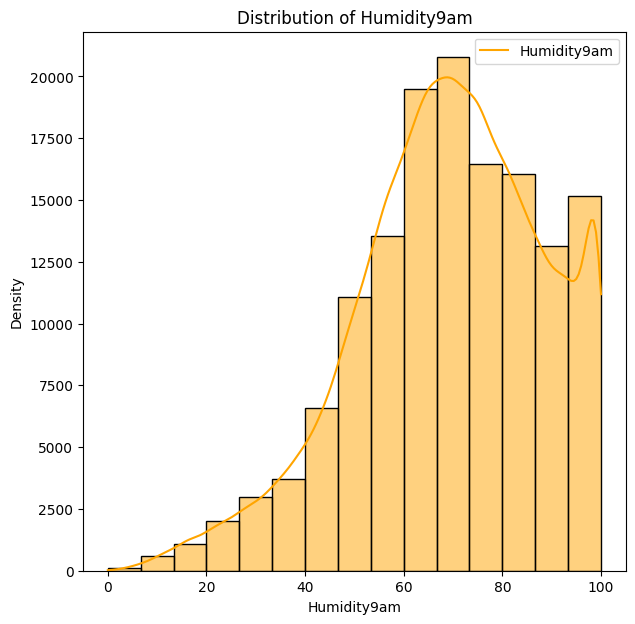

<Figure size 1000x800 with 0 Axes>

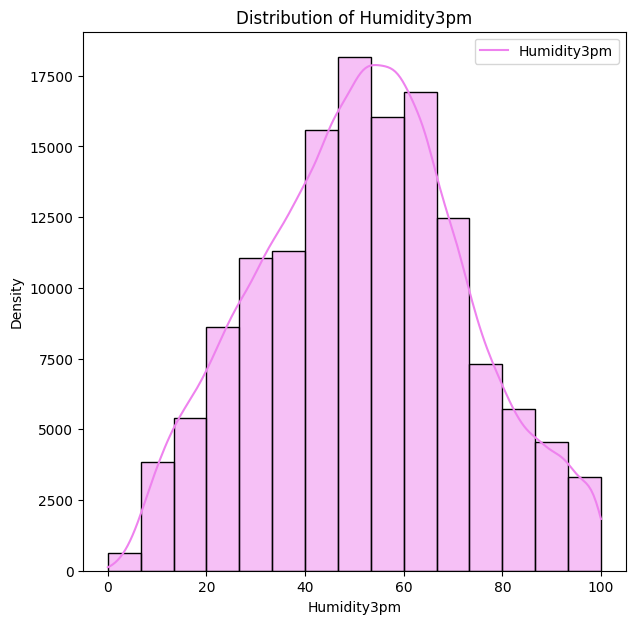

<Figure size 1000x800 with 0 Axes>

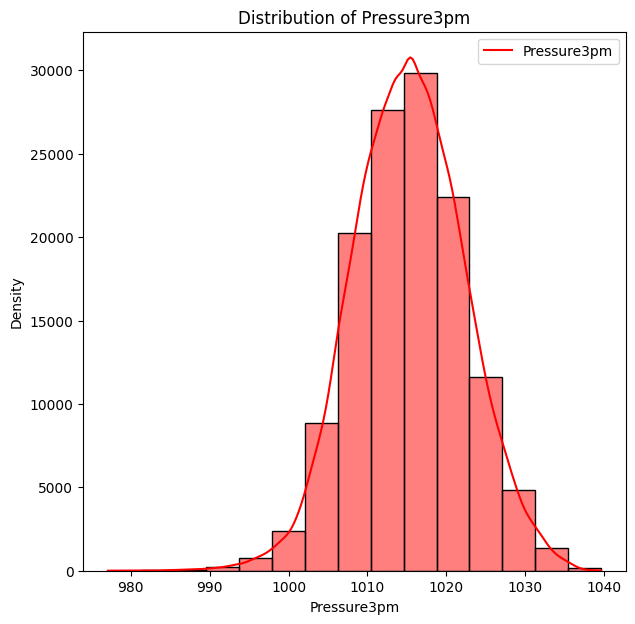

<Figure size 1000x800 with 0 Axes>

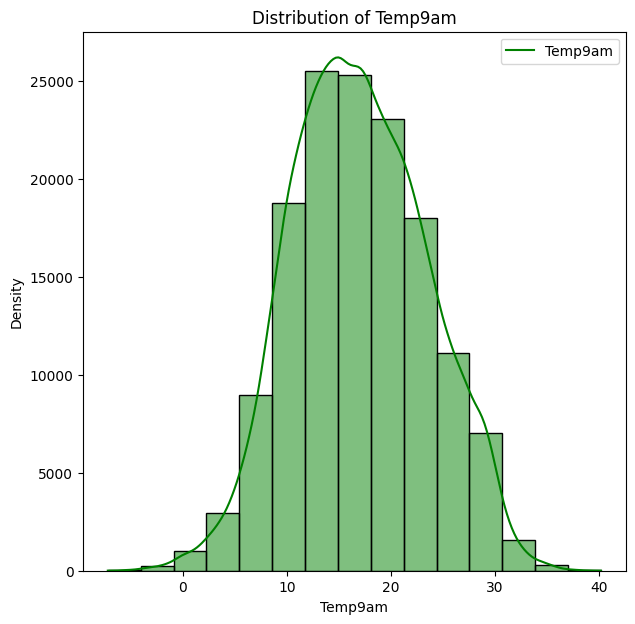

<Figure size 1000x800 with 0 Axes>

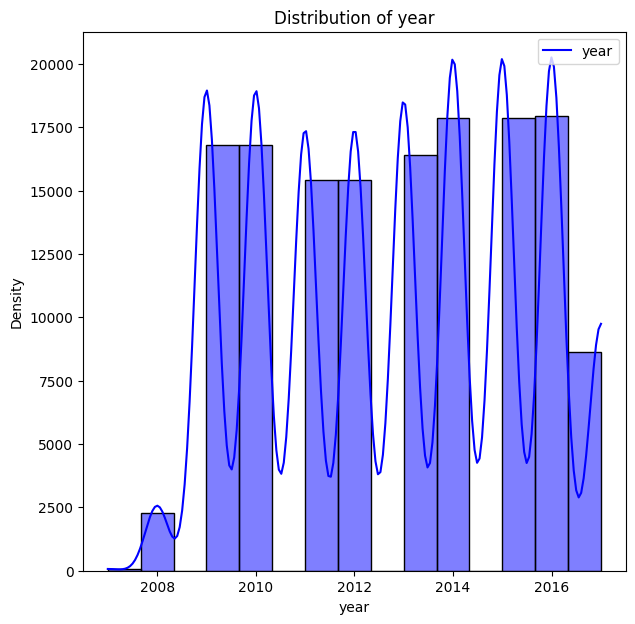

<Figure size 1000x800 with 0 Axes>

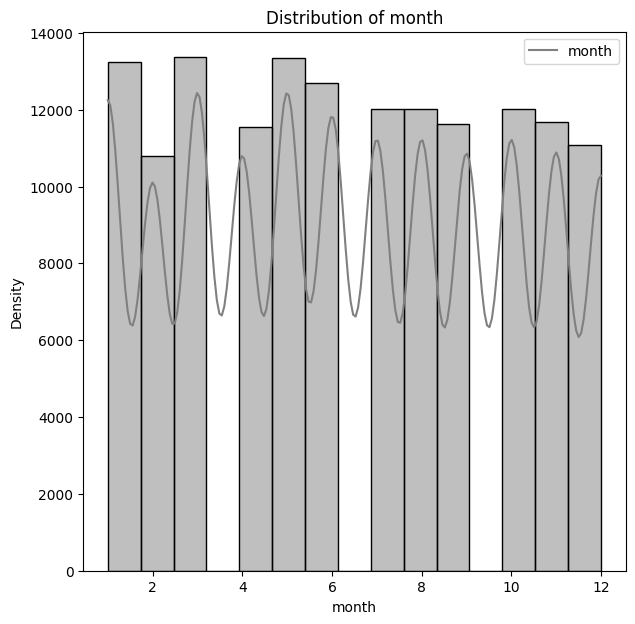

<Figure size 1000x800 with 0 Axes>

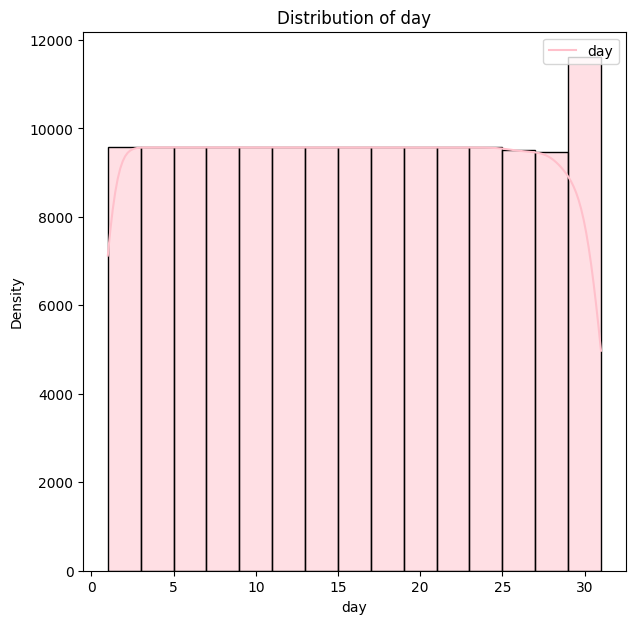

<Figure size 1000x800 with 0 Axes>

In [ ]:
# membuat list warna grafik
colors_list=["red", "green", "blue", "grey","pink", "purple", "orange", "violet", "red", "green", "blue", "grey", "pink", "purple", "orange", "violet", "red"]
# membuat perulangan untuk memvisualisaikan beberapa grafik
for i in range(len(numeric)):
    plt.figure(figsize=(7,7))
    sns.histplot(data[numeric[i]], color=colors_list[i], kde=True, bins=15)
    label=numeric[i]
    plt.xlabel(numeric[i])
    plt.ylabel("Density")

    # Title
    plt.title(f'Distribution of {numeric[i]}', size=12)

    # Legend
    plt.legend([f'{numeric[i]}'], loc='upper right')

    # Custom size
    plt.figure(figsize=(10, 8))

    # Custom color
    sns.set_palette(sns.color_palette('Blues', 2))

    plt.show()


### 5.5 Lokasi mana yang memiliki curah hujan paling tinggi?
Pengecekan ini dilakukan untuk melihat persebaran hujan di Australia.

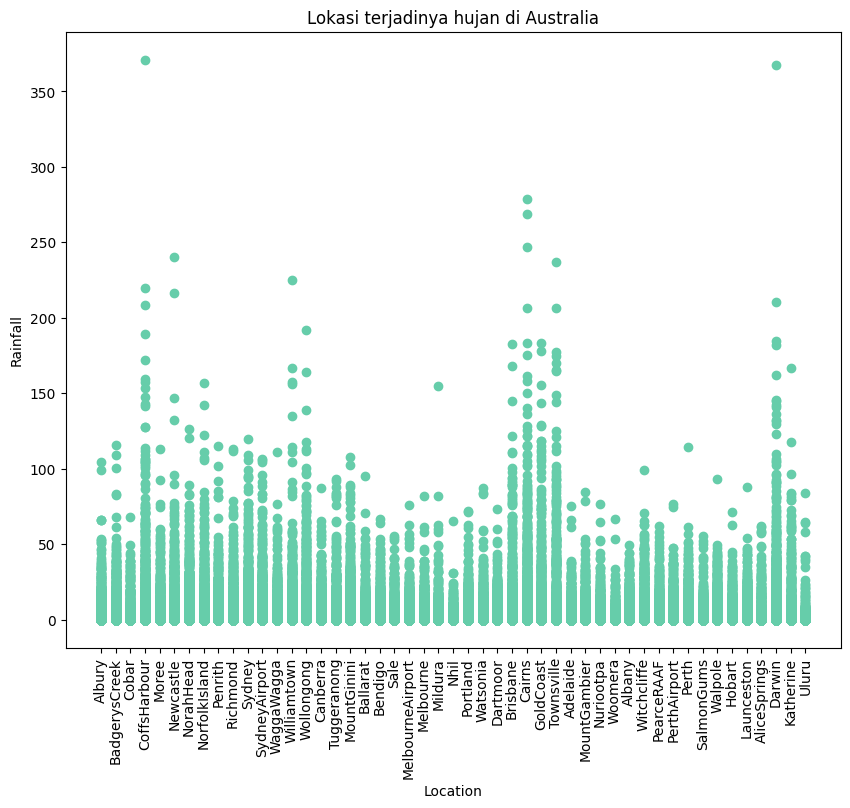

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data['Location'], data['Rainfall'], color='mediumaquamarine')
plt.xticks(rotation=90)
plt.title("Lokasi terjadinya hujan di Australia")
plt.xlabel("Location")
plt.ylabel("Rainfall")
plt.show()

In [ ]:
data_locr = data.loc[:,['Location', 'Rainfall']]
data_locr.sort_values(by='Rainfall', ascending=False, inplace=True)
data_locr.head()

,Location,Rainfall
9368,CoffsHarbour,371.0
140071,Darwin,367.6
87242,Cairns,278.4
87995,Cairns,268.6
89371,Cairns,247.2


**Note:**
*   Curah hujan tertinggi terletak di CoffsHarbour dengan rainfall 371.0 mm
*   Curah hujan tertinggi kedua terletak di Darwin dengan rainfall 367.6 mm
*   Curah hujan tertinggi ketiga terletak di Cairns dengan rainfall 278.4, 268.6, dan 247.2 mm




### 5.6 Apakah kolom MinTemp dan MaxTemp berpengaruh terhadap prediksi RainTomorrow?
Pengecekan ini dilakukan untuk memeriksa feature penting dalam proses prediksi.

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

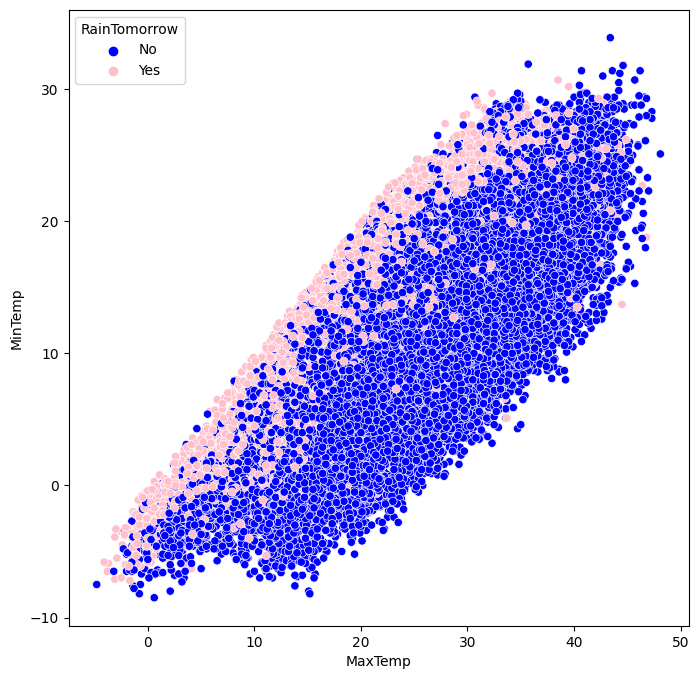

In [ ]:
plt.figure(figsize=(8,8))
cols = ['blue','pink', 'yellow']
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = cols, data = data)

**Note:**
*   Titik berwarna pink menunjukkan prediksi 'yes' untuk RainTomorrow, sedangkan titik biru menunjukkan prediksi sebaliknya.
*   Terjadi korelasi yang kuat antara kolom MinTemp dan MaxTemp dengan RainTomorrow.



### 5.7 Central Tendency dan Measures of Spread
**Note:**
1. Central tendency menunjukkan titik tengah dari suatu dataset untuk mengetahui posisi banyak nilai data berkumpul. Central tendency yang sering digunakan adalah mean, median, dan modus.
2. Measures of Spread merupakan pendeskripsian data untuk melihat distribusi data. Measures of spread yang sering digunakan adalah range, variance, dan standard deviasi.

In [ ]:
# Kolom bertipe data integer
data_central = data.loc[:,['MinTemp','Rainfall','WindGustSpeed','Humidity3pm']]
data_central.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm
0,13.4,0.6,44.0,22.0
1,7.4,0.0,44.0,25.0
2,12.9,0.0,46.0,30.0
3,9.2,0.0,24.0,16.0
4,17.5,1.0,41.0,33.0


In [ ]:
for col in data_central:
    mean = data_central[col].mean()
    median = data_central[col].median()
    mode = data_central[col].mode()[0]
    min_value = data_central[col].min()
    max_value = data_central[col].max()
    range_value = max_value - min_value
    variance = data_central[col].var()
    std_dev = data_central[col].std()

#Print hasilnya
    print(f"Nama Kolom: {col}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: MinTemp
Mean: 12.194
Median: 12.000
Modus: 11.000
Range: 42.400
Variansi: 40.941
Standard Deviasi: 6.398
  
Nama Kolom: Rainfall
Mean: 2.361
Median: 0.000
Modus: 0.000
Range: 371.000
Variansi: 71.877
Standard Deviasi: 8.478
  
Nama Kolom: WindGustSpeed
Mean: 40.035
Median: 39.000
Modus: 35.000
Range: 129.000
Variansi: 185.152
Standard Deviasi: 13.607
  
Nama Kolom: Humidity3pm
Mean: 51.539
Median: 52.000
Modus: 52.000
Range: 100.000
Variansi: 432.470
Standard Deviasi: 20.796
  


### 5.8 Cardinality
Cardinality/kardinalitas dilakukan untuk mengidentifikasi label atau data unik pada kolom tertentu dimana hal ini penting untuk memastikan model konsisten. KArena kardinalitas yang tinngi dapat menimbulkan masalah dalam model dan juga masalah dimensi peningkatan data ketika dikodekan ke data numerik.

In [ ]:
for feature in categorical:
  unique_value = len(data[feature].unique())
  print(f'Cardinality of {format(feature)} : {unique_value}')

Cardinality of Location : 49
Cardinality of WindGustDir : 17
Cardinality of WindDir9am : 17
Cardinality of WindDir3pm : 17
Cardinality of RainToday : 3
Cardinality of RainTomorrow : 3


Dari fitur kategorikal yang ada, data ini masih bisa dilakukan dilakukan pemodelan.  

## **6. Preprocessing Data**
Preprocessing data dilakukan untuk mengatasi permasalahan yang dapat mengganggu pemodelan, contohnya format yang tidak konsisten.

### 6.1 Mengolah missing value dan Outliers
Hal ini karena missing value berpengaruh terhadap model prediksi, konsistensi data, dan penting untuk statistik deskriptif.

In [ ]:
# periksa Missing value pada kolom kategorikal
categorical = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
data[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Untuk mengisi missing value yang ada pada kolom kategorikal, dibanding dengan menghapus missing value tersebut yang mengakibatkan berkurangnya banyak data. Kelompok kami memutuskan untuk mengisi missing value tersebut dengan mode(), atau data yang paling sering muncul pada kolom tersebut.

In [ ]:
# di isi dengan mode
categorical_null = [feature for feature in categorical if data[feature].isnull().sum()]
for feature in categorical_null:
    mode_categ = data[feature].mode()[0]
    data[feature].fillna(mode_categ,inplace=True)

In [ ]:
# memeriksa missing value pada kolom numerik
numerical = [column_name for column_name in data.columns if data[column_name].dtype != 'O']
data[numeric].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure3pm      15028
Temp9am           1767
year                 0
month                0
day                  0
dtype: int64

Terdapat 10 kolom yang memiliki missing value. Disini kami memutuskan untuk mengisi missing value pada kolom numerik dengan menggunakan mean(). Karena mean sensitif terhadap outlier, maka outliers pada fitur numerik perlu ditangani

In [ ]:
# Menangani Outliers

# fitur numerik yang memiliki outliers
outliers_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm']
for feature in outliers_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5) # lower limit outliers
    upper_limit = q3 + (IQR*1.5) # upper limit outliers


In [ ]:
# data baru bebas dari outliers
data = data[(data[feature] >= lower_limit) & (data[feature] <= upper_limit)]

In [ ]:
# memeriksa ouliers (lower limit) di data baru
data[data[feature] < lower_limit]

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainToday,RainTomorrow,year,month,day


In [ ]:
# memeriksa ouliers (upper limit) di data baru
data[data[feature] > upper_limit]

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainToday,RainTomorrow,year,month,day


In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainToday,RainTomorrow,year,month,day
count,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000,129513.000000
mean,12.478522,23.486452,2.326496,40.032836,14.322190,19.040910,68.425856,51.223795,1015.321125,17.242774,0.218743,0.218302,2012.748033,6.396725,15.707751
std,6.321409,6.949167,8.375222,13.035026,8.803289,8.631021,18.861619,20.453878,6.811587,6.402160,0.413395,0.413095,2.536193,3.427020,8.795446
min,-8.200000,2.600000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,996.000000,-3.100000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.900000,18.100000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1010.500000,12.500000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.300000,22.900000,0.000000,39.000000,13.000000,19.000000,69.000000,51.223795,1015.300000,16.900000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,17.100000,28.400000,0.800000,46.000000,20.000000,24.000000,82.000000,65.000000,1020.000000,21.800000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,135.000000,87.000000,87.000000,100.000000,100.000000,1034.400000,40.200000,1.000000,1.000000,2017.000000,12.000000,31.000000


Sekarang data sudah bebasa dari outliers. Setelah data bebas dari outliers, sekarang proses mengisi missing value dengan mean() dapat dilakukan.

In [ ]:
numerical_null = [feature for feature in numeric if data[feature].isnull().sum()]
for feature in numerical_null:
    mean_value = data[feature].mean()
    data[feature].fillna(mean_value,inplace=True)

In [ ]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Temp9am          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

**Note:**
Sekarang data weatherAUS bebas dari Nan value. Kemudian cek data duplikat.

### 6.2 Melihat dan mengolah data duplicate
Hal ini karena data duplikat berpengaruh terhadap model prediksi, konsistensi data, dan penting untuk statistik deksriptif.

In [ ]:
data.duplicated().sum()

0

**Note:** Tidak terdapat data duplikat.

In [ ]:
data.shape

(129513, 19)

In [ ]:
# data_model=data.copy()
# data_model.to_csv('rain_data_model.csv', index=False)

### 6.3 Proses Label Encoding
Convert categorical variables menjadi numerical variables. Dalam penggunaan logistic regression dan SVM tahap ini diperlukan karena kedua model tersebut membutuhkan data dalam bentuk numerik.

In [ ]:
# mengubah kategori 'Yes' dan 'No' pada kolom RainToday dan RainTomorow menjadi numerik
data['RainToday'].replace({'No':0,'Yes':1}, inplace=True)
data['RainTomorrow'].replace({'No':0,'Yes':1}, inplace=True)

In [ ]:
# melihat perubahan data
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,16.9,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,17.2,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,21.0,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,18.1,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,17.8,0,0,2008,12,5


In [ ]:
data_cor = data.loc[:,['Location','MinTemp','Rainfall','Humidity9am','WindGustSpeed','Humidity3pm','RainToday','RainTomorrow']]
data_cor.head()

,Location,MinTemp,Rainfall,Humidity9am,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,Albury,13.4,0.6,71.0,44.0,22.0,0,0
1,Albury,7.4,0.0,44.0,44.0,25.0,0,0
2,Albury,12.9,0.0,38.0,46.0,30.0,0,0
3,Albury,9.2,0.0,45.0,24.0,16.0,0,0
4,Albury,17.5,1.0,82.0,41.0,33.0,0,0


Kolom yang dipilih pada variabel data_cor ini dipilih karena memiliki korelasi yang cukup tinggi untuk mengklasifikasi output (Raintomorrow)

<Axes: >

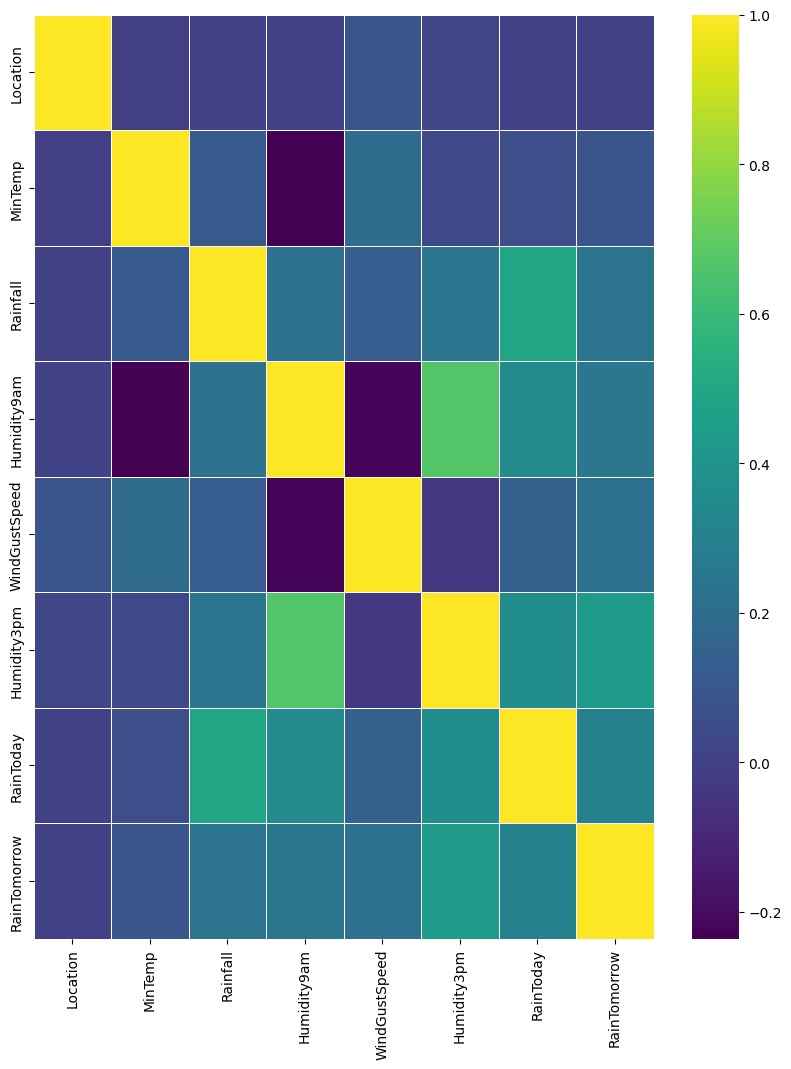

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(data_cor.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

**Note:**
Kolom yang memiliki korelasi cukup tinggi dengan RainTomorrow:
*   Humidity3pm
*   Humidity9am
*   WindGustSpeed
*   RainToday
*   RainTomorrow
*   Rainfall
*   Location
*   MinTemp




Menyimpan data untuk .csv deployment

In [ ]:
# data_encode_rain=data_cor.copy()
# data_encode_rain.to_csv('rain_data_encode.csv', index=False)

In [ ]:
data_cor.shape

(129513, 8)

In [ ]:
# label encoding
def label_encoder(data, feature):
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    return data


for col in data_cor.select_dtypes(include='O').columns:
    data_cor = label_encoder(data_cor, col)

data_cor.head()


,Location,MinTemp,Rainfall,Humidity9am,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,2,13.4,0.6,71.0,44.0,22.0,0,0
1,2,7.4,0.0,44.0,44.0,25.0,0,0
2,2,12.9,0.0,38.0,46.0,30.0,0,0
3,2,9.2,0.0,45.0,24.0,16.0,0,0
4,2,17.5,1.0,82.0,41.0,33.0,0,0


label encoding ini dilakukan unutk mengubah data kategorik menjadi data numerik sehingga menudahkan pemodelan

### 6.4 Split dataset menjadi data uji dan data latih

In [ ]:
# Mendefinisikan kolom X dan Y
X = data_cor.drop(['RainTomorrow'], axis = 1)
y = data_cor['RainTomorrow']

In [ ]:
data_cor.shape

(129513, 8)

In [ ]:
data_cor.head()

,Location,MinTemp,Rainfall,Humidity9am,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,2,13.4,0.6,71.0,44.0,22.0,0,0
1,2,7.4,0.0,44.0,44.0,25.0,0,0
2,2,12.9,0.0,38.0,46.0,30.0,0,0
3,2,9.2,0.0,45.0,24.0,16.0,0,0
4,2,17.5,1.0,82.0,41.0,33.0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103610, 7), (25903, 7), (103610,), (25903,))

### 6.4 Feature Scaling
Melakukan feature scaling sehingga memiliki rata-rata 0 dan standard deviasi 1. Hal ini diperlukan untuk mempercepat proses konvergensi algoritma, menghindari dominasi variabel, menghindari sensitivitas terhadap skala, dan menghindari masalah numerik.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **7. Pendefinisian Model, Pelatihan Model, dan Evaluasi Model**

### 7.1 Logistic Regression

7.1.1  Logistic Regression dan pelatihan

In [ ]:
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

7.2.2 Evaluasi Model

In [ ]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     20454
           1       0.70      0.44      0.54      5449

    accuracy                           0.84     25903
   macro avg       0.78      0.69      0.72     25903
weighted avg       0.83      0.84      0.83     25903

Training Score:
 83.65891323231348 %
Test Data Score:
 84.22576535536425 %
Accuracy Score:
 84.22576535536425 %


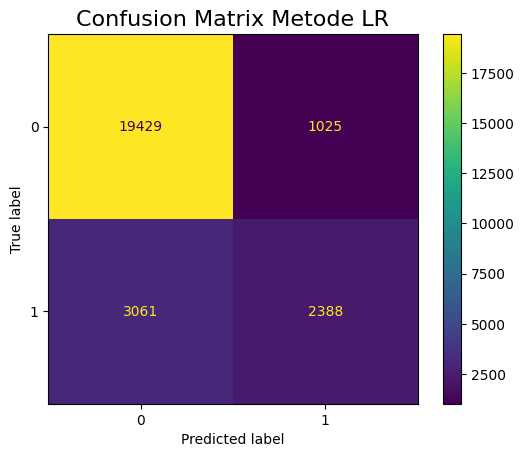

In [ ]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Training Score:\n", classifier_logreg.score(X_train, y_train) * 100, "%")
print("Test Data Score:\n", classifier_logreg.score(X_test, y_test) * 100, "%")
print("Accuracy Score:\n", accuracy_score(y_test, y_pred) * 100,"%")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()

# Title
plt.title('Confusion Matrix Metode LR', size=16)

plt.show()

* Precision untuk kelas 0 adalah 0.86, yang berarti prediksi yang diklasifikasikan sebagai kelas 0, 86% benar.

* Recall untuk kelas 0 adalah 0.95, yang berarti dari semua instance yang sebenarnya merupakan kelas 0, model berhasil mengklasifikasikan 95% dengan benar.

* Dan F1-Score untuk kelas 0 adalah 0.90, yang merupakan harmonic mean dari precision dan recall.

* Untuk kelas 1, precision, recall, dan F1-Score-nya lebih rendah, yaitu masing-masing 0.70, 0.44, dan 0.54.

Hal ini menunjukkan bahwa model mungkin lebih baik dalam mengidentifikasi kelas 0 daripada kelas 1. Training score sebesar 83.66% dan test data score sebesar 84.23%, menunjukkan bahwa model memiliki performa yang relatif baik dan tidak terlalu overfit atau underfit.

No Skill ROC AUC Score            = 0.5
Logistic Regression ROC AUC Score = 0.8399614581268017


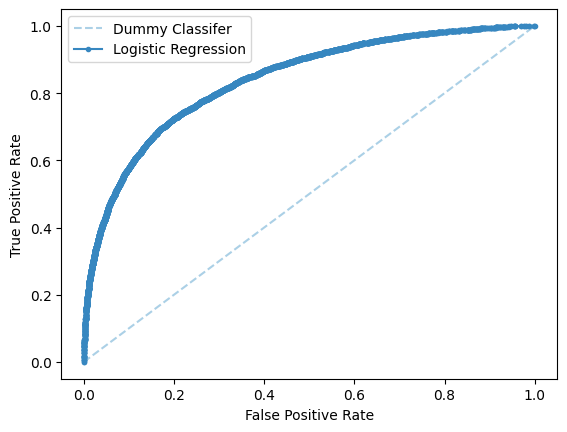

In [ ]:
# Kurva ROC
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = classifier_logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill ROC AUC Score            =', ns_auc)
print('Logistic Regression ROC AUC Score =', lr_auc)


ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# kurva ROC  model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# axis label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Note:** Kurva ROC diperlukan untuk mengukur kinerja model yang komprehensif dan mengukur kinerja model diana garis horizontal menggambarkan false positif dan garis vertikal menggambarkan true positif. Pada kurva ROC, semakin besar nilai AUC-ROC maka performa model semakin baik

Dengan ROC AUC Score sebesar 0.840, model Logistic Regression ini memberikan peningkatan yang cukup baik dibandingkan dengan prediksi acak (No Skill), yang memiliki ROC AUC 0.5. Ini menunjukkan bahwa model Logistic Regression ini memiliki kemampuan yang baik untuk membedakan antara kelas positif dan negatif.

### 7.2 SVM

7.2.1 Pendefinisian Model

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear',probability=True)

7.2.2 Pelatihan Model

In [ ]:
clf_svm.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

7.2.3 Evaluasi Model

In [ ]:
# Membuat klasifikasi pada data test
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8422576535536425


Skor akurassi yang dimiliki oleh model logistig regression dan SVM tidak jauh berbeda bahkan hampir sama yaitu 84 %

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     20454
           1       0.73      0.39      0.51      5449

    accuracy                           0.84     25903
   macro avg       0.80      0.68      0.71     25903
weighted avg       0.83      0.84      0.82     25903

Training Score:
 83.55853682077019
Accuracy Score:
 0.8425278925221017


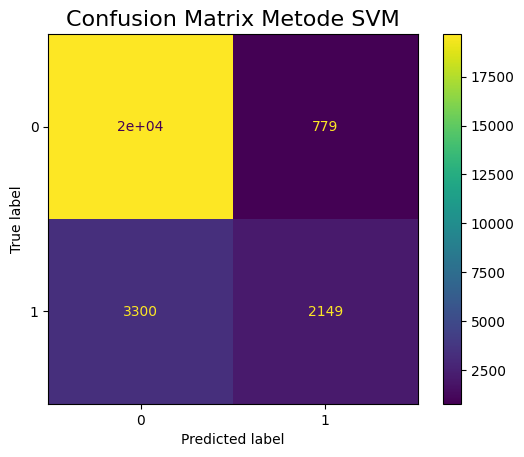

In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))
print("Training Score:\n", clf_svm.score(X_train, y_train) * 100)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()

# Title
plt.title('Confusion Matrix Metode SVM', size=16)

plt.show()

**Note:**
Confusion matrix digunakan karena memberikan informasi rinci terkait kinerja model

Tetapi terdapat sedikit perbedaan pada perbandingan confusion matriks pada model logistic regression dan SVM dimana, SVM mampu mengklasifikasi kelas 0 sedikit lebih banyak dibanding dengan Logistic regression yaitu 20,000. begitu pula dengan klasifikasi kelas 1 yang lebih sedikit yaitu 2149.

Model SVM ini memiliki akurasi yang baik dan memiliki kinerja yang baik dalam mengidentifikasi kelas 0. Tetapi pada performa model pada kelas 1 (precision, recall, dan F1-Score) lebih rendah,

No Skill ROC AUC Score = 0.5
SVM ROC AUC Score      = 0.8390770965409305


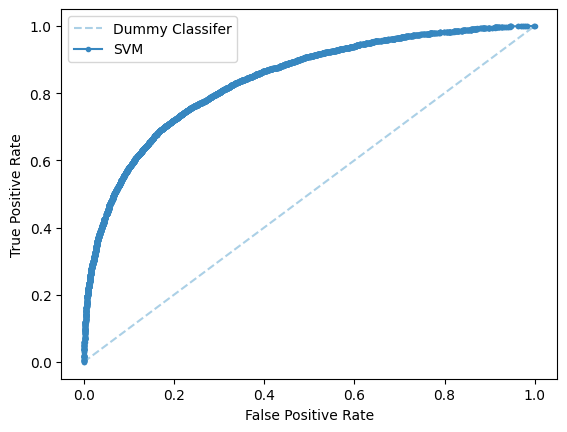

In [ ]:
# Kurva ROC
ns_probs = [0 for _ in range(len(y_test))]
SVM_probs = clf_svm.predict_proba(X_test)
SVM_probs = SVM_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
SVM_auc = roc_auc_score(y_test, SVM_probs)

print('No Skill ROC AUC Score =', ns_auc)
print('SVM ROC AUC Score      =', SVM_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(SVM_fpr, SVM_tpr, marker='.', label='SVM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

Sama halnya dengan Logistic regression pada model SVM ini nilai ROC AUC Score yang dimiliki adalah 0.840 yang hampir sama dengan model sebelumnya, Bahkan nilai prediksi acak (No Skill) pada model ini sama dengan model Logistic regression, yang memiliki ROC AUC 0.5.

Menyimpan model Logistic Regression dan SVM

In [ ]:
# import pickle
# with open('logreg.pkl', 'wb') as file:
#     pickle.dump(classifier_logreg, file)

In [ ]:
# with open('svm.pkl', 'wb') as file:
#     pickle.dump(clf_svm, file)

## **8. Model Improvement**
Model improvement bertujuan untuk meningkatkan performa model. Pada project ini akan digunakan **GridSearchCV** dan **K-Fold Cross Validation**.

### 8.1 GridSearchCV
GridSearchCV merupakan fungsi library python yang mengulang melalui parameter yang ditentukan terlebih dahulu dan diimplementasikan pada model untuk memperoleh parameter terbaik.

8.1.1 Logistic Regression

In [ ]:
# Tentukan hyperparameter
param_grid = {'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10]}

# Grid search untuk menemukan hyperparameter terbaik
grid_search_lr = GridSearchCV(estimator=classifier_logreg, param_grid=param_grid, cv=5)
grid_search_lr.fit(X_test, y_test)

# Print parameter and akurasi terbaik
print("Best Parameters :", grid_search_lr.best_params_)
print("Best Accuracy   :", grid_search_lr.best_score_)

# Buat model dengan estimator terbaik
best_estimator = grid_search_lr.best_estimator_
Y_pred_lr = best_estimator.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, Y_pred_lr))

Best Parameters : {'C': 0.1, 'penalty': 'l1'}
Best Accuracy   : 0.8432228688279645
Accuracy Score: 0.8433000038605567


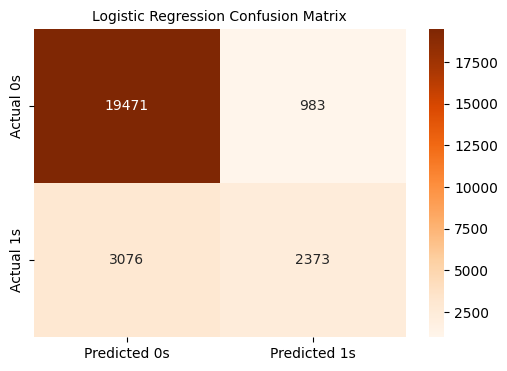

In [ ]:
# Evaluasi Model
cm1 = confusion_matrix(y_test, Y_pred_lr)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Logistic Regression Confusion Matrix", fontsize=10)
sns.heatmap(cm1, annot=True, cmap='Oranges', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('Actual 0s','Actual 1s'));

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.83896342 0.83534408 0.83674356 0.83437892 0.83712962]
Average cross-validation score: 0.8365119196988708


Rata-rata skor akurasi cross-validation sedikit turun dari skor akurasi model asli yaitu 83%, jadi keakuratan model tidak dapat ditingkatkan dengan menggunakan Cross Validation

8.1.2 SVM

In [ ]:
# Definisikan model SVM
svm = SVC(probability=True)

# Definisikan parameter grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid search untuk menemukan hyperparameter terbaik
grid_search_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_test, y_test)

# Print parameter and akurasi terbaik
print("Best Parameters :", grid_search_svm.best_params_)
print("Best Accuracy   :", grid_search_svm.best_score_)

# Buat model dengan estimator terbaik
best_estimator = grid_search_svm.best_estimator_
Y_pred_svm = best_estimator.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, Y_pred_svm))

Best Parameters : {'C': 10}
Best Accuracy   : 0.8431454848015358
Accuracy Score: 0.851445778481257


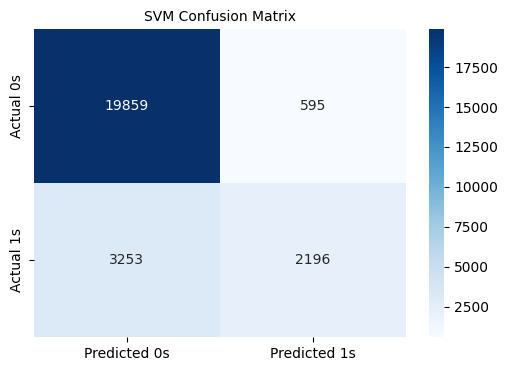

In [ ]:
# Evaluasi Model
cm2 = confusion_matrix(y_test, Y_pred_svm)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("SVM Confusion Matrix", fontsize=10)
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('Actual 0s','Actual 1s'));

### 8.2 K-Fold Cross-Validation
K-Fold Cross-Validation merupakan metode yang bekerja dengan membagi data menjadi k lipatan yang sama. Model ditraining sebanyak k kali dimana pada setiap iterasi, satu lipatan sebagai data training dan sisanya sebagai data testing

8.2.1 Logistic Regression

In [ ]:
# Menentukan jumlah fold
k = 10

# Gunakan cross_val_score untuk menghitung skor validasi silang (R^2) setiap fold
scores_lr = cross_val_score(classifier_logreg, X, y, cv=k)

# Evaluasi
print(f'Skor validasi silang untuk setiap fold : {scores_lr}')
print(f'Rata-rata skor validasi silang         : {scores_lr.mean()}')

Skor validasi silang untuk setiap fold : [0.84527486 0.82419704 0.82543237 0.83537951 0.83738707 0.8320593
 0.84333256 0.8336808  0.83568836 0.84757934]
Rata-rata skor validasi silang         : 0.8360011203438971


8.2.2 SVM

In [ ]:
# Menentukan jumlah fold
k = 10

# Gunakan cross_val_score untuk menghitung skor validasi silang (R^2) untuk setiap fold
scores_svm = cross_val_score(SVC(), X, y, cv=k)

# Evaluasi
print(f'Skor validasi silang untuk setiap fold : {scores_svm}')
print(f'Rata-rata skor validasi silang         : {scores_svm.mean()}')

Skor validasi silang untuk setiap fold : [0.84488882 0.83909821 0.8343113  0.84047564 0.83592001 0.83622886
 0.83545672 0.82835302 0.83074666 0.8407845 ]
Rata-rata skor validasi silang         : 0.8366263740380487


* Logistic Regression Improvement:

  Dengan menggunakan GridSearchCV, model Logistic Regression berhasil ditingkatkan dengan peningkatan akurasi menjadi 84.33%. Cross-validation dan K-Fold Cross-Validation menunjukkan hasil yang konsisten dengan akurasi yang ditingkatkan.

* Support Vector Machine Improvement:

  Pada model SVM, hasil GridSearchCV menunjukkan peningkatan akurasi menjadi 84.31%, sedangkan hasil K-Fold Cross-Validation menunjukkan rata-rata skor validasi silang sebesar 83.66%.

## **9. Perbandingan Performa Model**
Hal ini diperlukan untuk menentukan model yang paling baik dalam melakukan prediksi

### 9.1 Perbandingan Kurva ROC

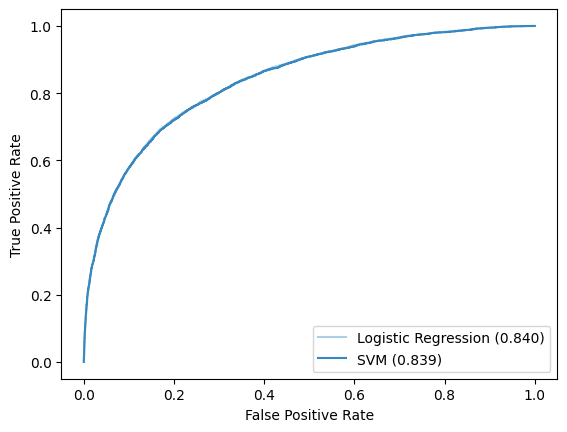

In [ ]:
#define metrics
Y_pred_proba1 = classifier_logreg.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, Y_pred_proba1)
auc1 = auc(fpr1, tpr1)

Y_pred_proba2 = clf_svm.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, Y_pred_proba2)
auc2 = auc(fpr2, tpr2)

#create ROC curve
plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
plt.plot(fpr2,tpr2, label='SVM (%0.3f)' % auc2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### 9.2 Perbandingan Hasil Klasifikasi menggunakan Logistic Regression dan SVM

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.842258,0.699678,0.438246,0.53893
1,SVM,0.842258,0.699678,0.438246,0.53893


Akurasi Logistic Regression: 84.23%
Akurasi SVM: 84.23%


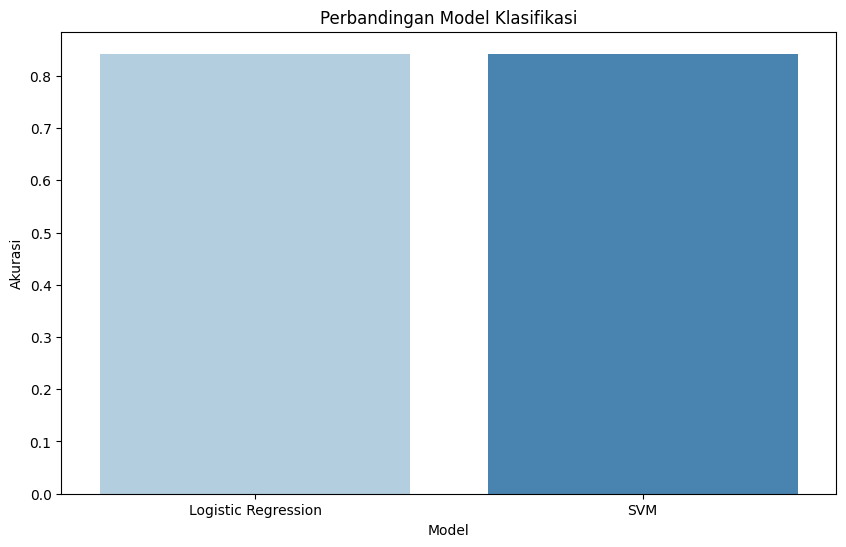

In [ ]:
# Inisialisasi model
models = [('Logistic Regression', classifier_logreg),
          ('SVM', clf_svm)]

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Buat tabel
results_data = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_data)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.color_palette("Set2")
sns.barplot(x='Model', y='Accuracy', data=results_data)
plt.title('Perbandingan Model Klasifikasi') # Membuat judul barplot
plt.xticks(rotation=0)
plt.ylabel('Akurasi')
for idx, row in results_data.iterrows():
    print(f"Akurasi {row['Model']}: {row['Accuracy']*100:.2f}%")

plt.show()

## **10. Model Inference**
Model inference berarti mencoba model yang telah dibuat pada data selain data yang sudah tersedia. Data dapat berupa data buatan atau data yang ada pada internet.

Model inference project ini dibuat dataset yang serupa dengan dataset sebelumnya dengan total 7 kolom yaitu Location, MinTemp, Rainfall, WIndGustDir, WIndGustSpeed, Humadiy3pm, dan RainToday. Selanjutnya membuat prediksi menggunakan model yang telah dibuat sebelumnya.

In [ ]:
# Membuat data untuk melakukan model inference
model_inference = {'Location':[0.542753, 0.273645, 0.182743],
                   'MinTemp':[0.273942, 0.193848, 0.392837],
                   'Rainfall':[0.008263, 0.017258, 0.000129],
                   'Humidity9am':[0.133333, 0.200000, 0.0],
                   'WindGustSpeed':[0.429837, 0.152628, 0.336261],
                   'Humidity3pm':[0.718292, 0.625273, 0.827362],
                   'RainToday':[0, 1, 1]}

# Membuat dataframe dari model inference
model_inference = pd.DataFrame(model_inference)


# Print
pd.DataFrame((model_inference))

,Location,MinTemp,Rainfall,Humidity9am,WindGustSpeed,Humidity3pm,RainToday
0,0.542753,0.273942,0.008263,0.133333,0.429837,0.718292,0
1,0.273645,0.193848,0.017258,0.200000,0.152628,0.625273,1
2,0.182743,0.392837,0.000129,0.000000,0.336261,0.827362,1


Tampilan diatas adalah Dataframe inputan model inferance

In [ ]:
# Pelatihan Model
grid_search_svm.fit = cross_val_score(SVC(), X_train, y_train, cv=k)

# Evaluasi Model
predictions = grid_search_svm.predict(model_inference)
predictions

array([0, 0, 0])

Dari inputan model inference dapat dilihat bahwa model mampu dalam mengklasifikasi nilai inputan yang ada, dimana ketiga output mengklasifikasi kelas 0 yang berarti tidak hujan.

## **11. Kesimpulan**

Penelitian yang dilakukan menggunakan model **Logistic Regression** dan **SVM** melalui beberapa proses untu memastikan model yang dibuat memiliki performa baik dengan data yang valid dan relevan. Proses-proses tersebut, yaitu:
1.   Data Loading
2.   Data Cleaning
3.   Explore Data
4.   Preprocessing Data
5.   Pemodelan dan Evaluasi
6.   Model Improvement
7.   Model Inference

**Hasil training dan testing awal model:**

1. **Logistic Regression (LR):**

    Kelas 0:
      * Precision: 0.86
      * Recall: 0.95
      * F1-Score: 0.90

  Kelas 1:

      * Precision: 0.70
      * Recall: 0.44
      * F1-Score: 0.54

  Accuracy: 84.23%
2. **Support Vector Machine (SVM):**

    Kelas 0:
      * Precision: 0.86
      * Recall: 0.96
      *F1-Score: 0.91

  Kelas 1:
      * Precision: 0.73
      * Recall: 0.39
      * F1-Score: 0.51

  Accuracy: 84.25%

**Perbandingan:**

Kedua model (Logistic regression dan SVM) memiliki akurasi yang mirip, dengan SVM sedikit unggul (0.02% lebih tinggi).
SVM memiliki performa yang lebih baik dalam mengidentifikasi kelas 1 berdasarkan recall, precision, dan F1-Score, meskipun performa pada kelas 1 tetap relatif rendah untuk kedua model.
Logistic Regression memiliki performa yang lebih baik dalam mengidentifikasi kelas 0 berdasarkan recall dan F1-Score.

SVM cenderung memberikan hasil yang lebih seimbang antara kelas 0 dan kelas 1, sementara Logistic Regression cenderung lebih baik dalam mengidentifikasi kelas mayoritas (kelas 0).

---

Untuk meningkatkan performa model, dilakukan **model improvement** menggunakan metode GridSearchCV dan K-Fold Cross Validation. **Hasil melakukan model improvement, yaitu:**

1. Logistic Regression (LR) Improvement:
    1. GridSearchCV:
      * Best Parameters: {'C': 0.1, 'penalty': 'l1'}
      * Best Accuracy: 0.8432
      * Accuracy Score: 0.8433
    2. Cross Validation:
      * Cross-validation scores: [0.8390, 0.8353, 0.8367, 0.8344, 0.8371]
      * Average cross-validation score: 0.8365
    3. K-Fold Cross-Validation:
      * Rata-rata skor validasi silang: 0.8360

2. Support Vector Machine (SVM) Improvement:
    1. GridSearchCV:

      * Best Parameters: {'C': 10}
      * Best Accuracy: 0.8431
      * Accuracy Score: 0.8514
    2. K-Fold Cross-Validation:
      * Rata-rata skor validasi silang: 0.8366

**Perbandingan Model Improvement:**

* *Logistic Regression Improvement*:

  Dengan menggunakan *GridSearchCV*, model Logistic Regression berhasil ditingkatkan dengan peningkatan akurasi menjadi 84.33%. *Cross-validation* dan *K-Fold Cross-Validation* menunjukkan hasil akurasi yang hampir sama tetapi lebih rendah dari nilai akurasi model sebelum di optimalisasi.
* *Support Vector Machine Improvement*:

  Pada model SVM, hasil GridSearchCV menunjukkan peningkatan akurasi menjadi 84.31%, sedangkan hasil K-Fold Cross-Validation menunjukkan rata-rata skor validasi silang sebesar 83.66%.

Dari sini dapat disimpulkan bahwa model LR dan model SVM  performanya dapat dioptimalkan menggunakan *GridSearchCV*


## 12. Deployment
[Web App Rain Classify](https://rain-classify-in-australia.streamlit.app/)